In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_penguins = sns.load_dataset('penguins')

In [4]:
print("Palmer Penguins dataset loaded successfully for Data Visualization.")
print("\nFirst 5 rows of the DataFrame:")
print(df_penguins.head())

print("\nDataFrame Info:")
df_penguins.info()

print("\n")

Palmer Penguins dataset loaded successfully for Data Visualization.

First 5 rows of the DataFrame:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    

In [5]:
print("--- Basic Data Cleaning ---")
print("Missing values before cleaning:")
print(df_penguins.isnull().sum())


df_penguins_cleaned = df_penguins.dropna().copy()
print("\nMissing values after dropping rows with NaNs:")
print(df_penguins_cleaned.isnull().sum())
print(f"Original rows: {len(df_penguins)}, Cleaned rows: {len(df_penguins_cleaned)}")
print("\n")

--- Basic Data Cleaning ---
Missing values before cleaning:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Missing values after dropping rows with NaNs:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Original rows: 344, Cleaned rows: 333




--- Creating Visualizations ---


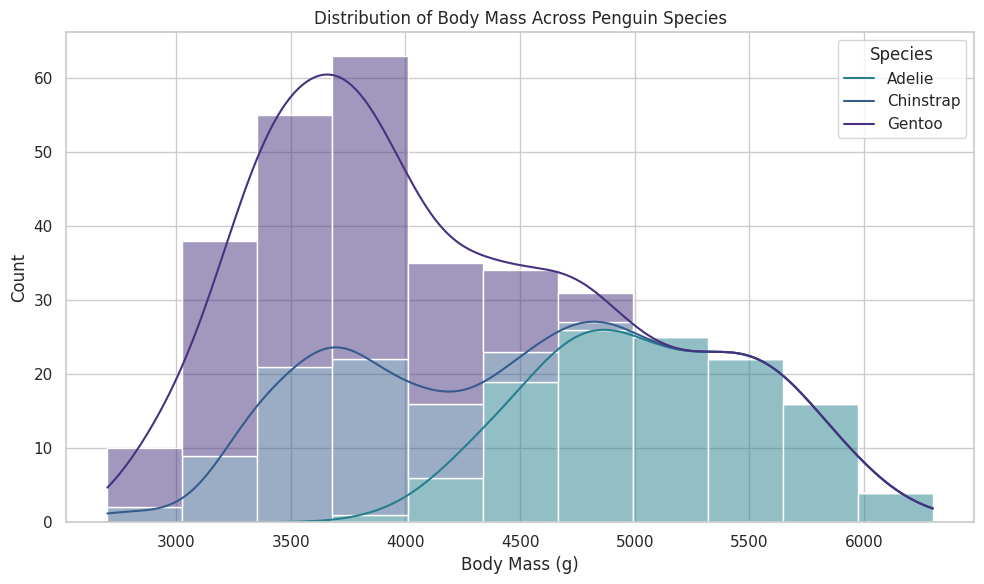

Observation: Adelie penguins generally have lower body mass, while Gentoo are largest. Chinstrap are in between.



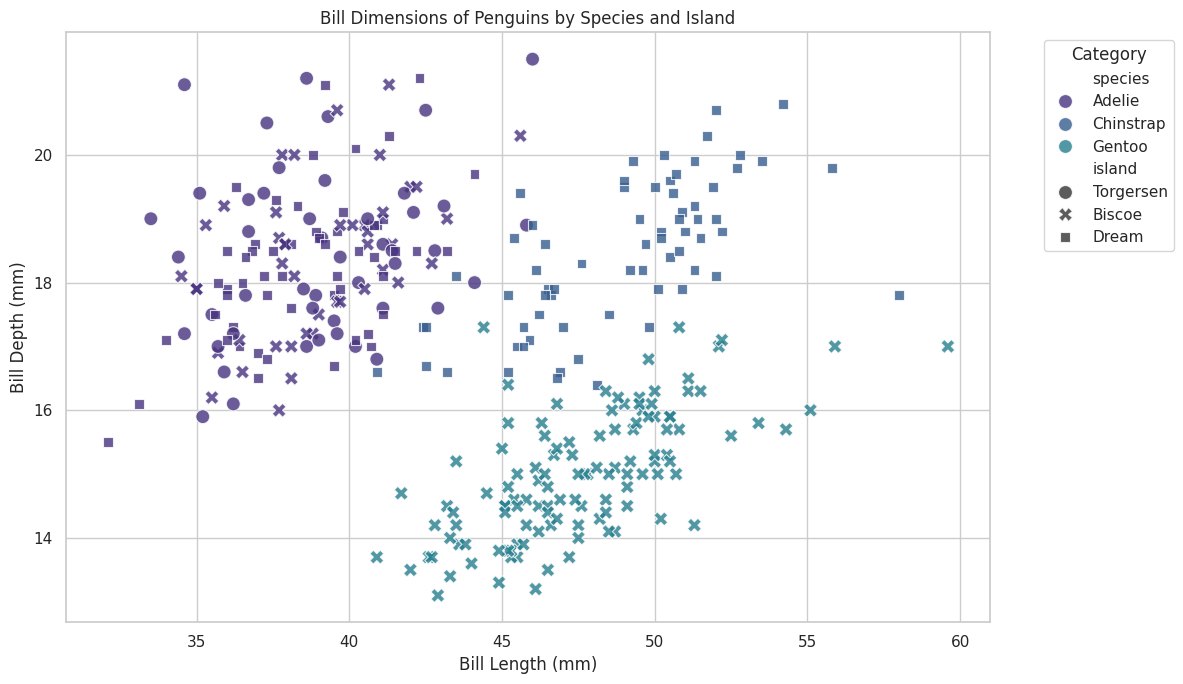

Observation: Species are clearly separable by bill dimensions. Islands also show some distinct clusters within species.



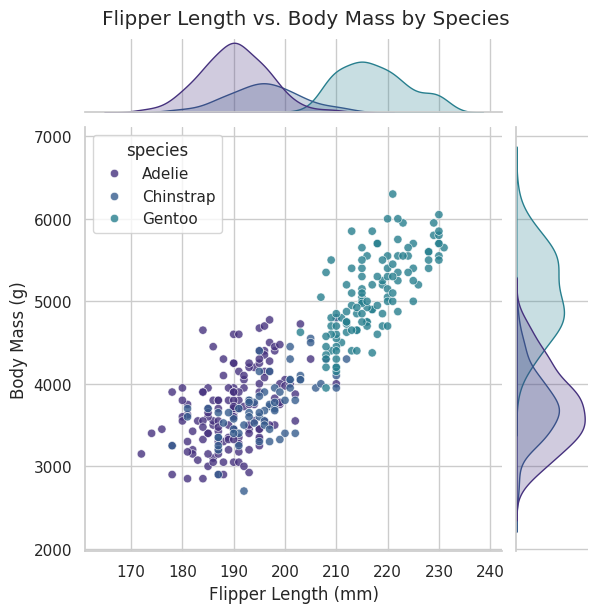

Observation: Flipper length and body mass are strongly positively correlated within each species, confirming expected biological relationships.



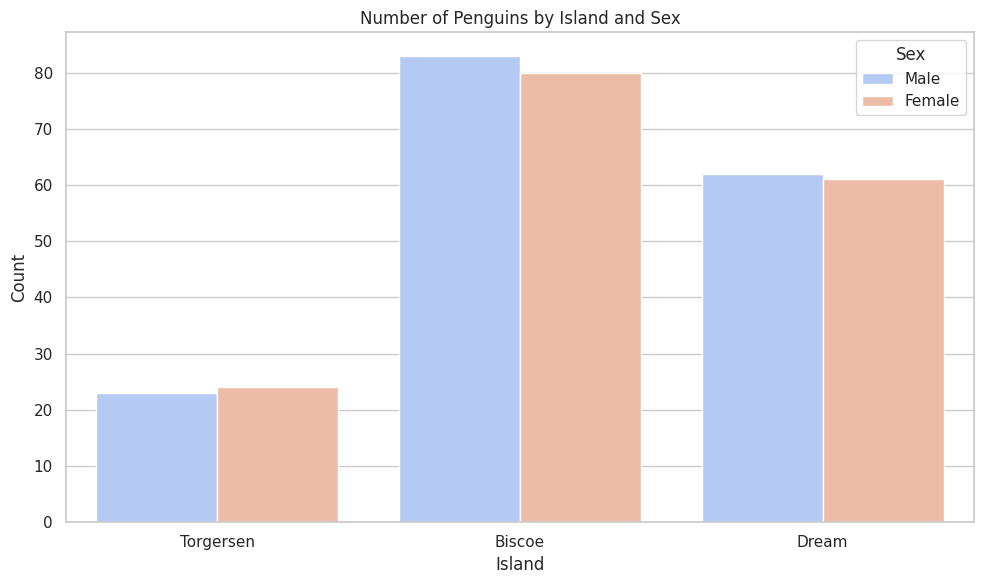

Observation: Biscoe has the most penguins. Male and female counts are generally balanced across islands.



/tmp/ipython-input-6-3547652034.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], data=df_penguins_cleaned, x='species', y=col, palette='plasma')
/tmp/ipython-input-6-3547652034.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], data=df_penguins_cleaned, x='species', y=col, palette='plasma')
/tmp/ipython-input-6-3547652034.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], data=df_penguins_cleaned, x='species', y=col, palette='plasma')
/tmp/ipython-input-6-3547652034.py:60: FutureWarning: 

Passing 

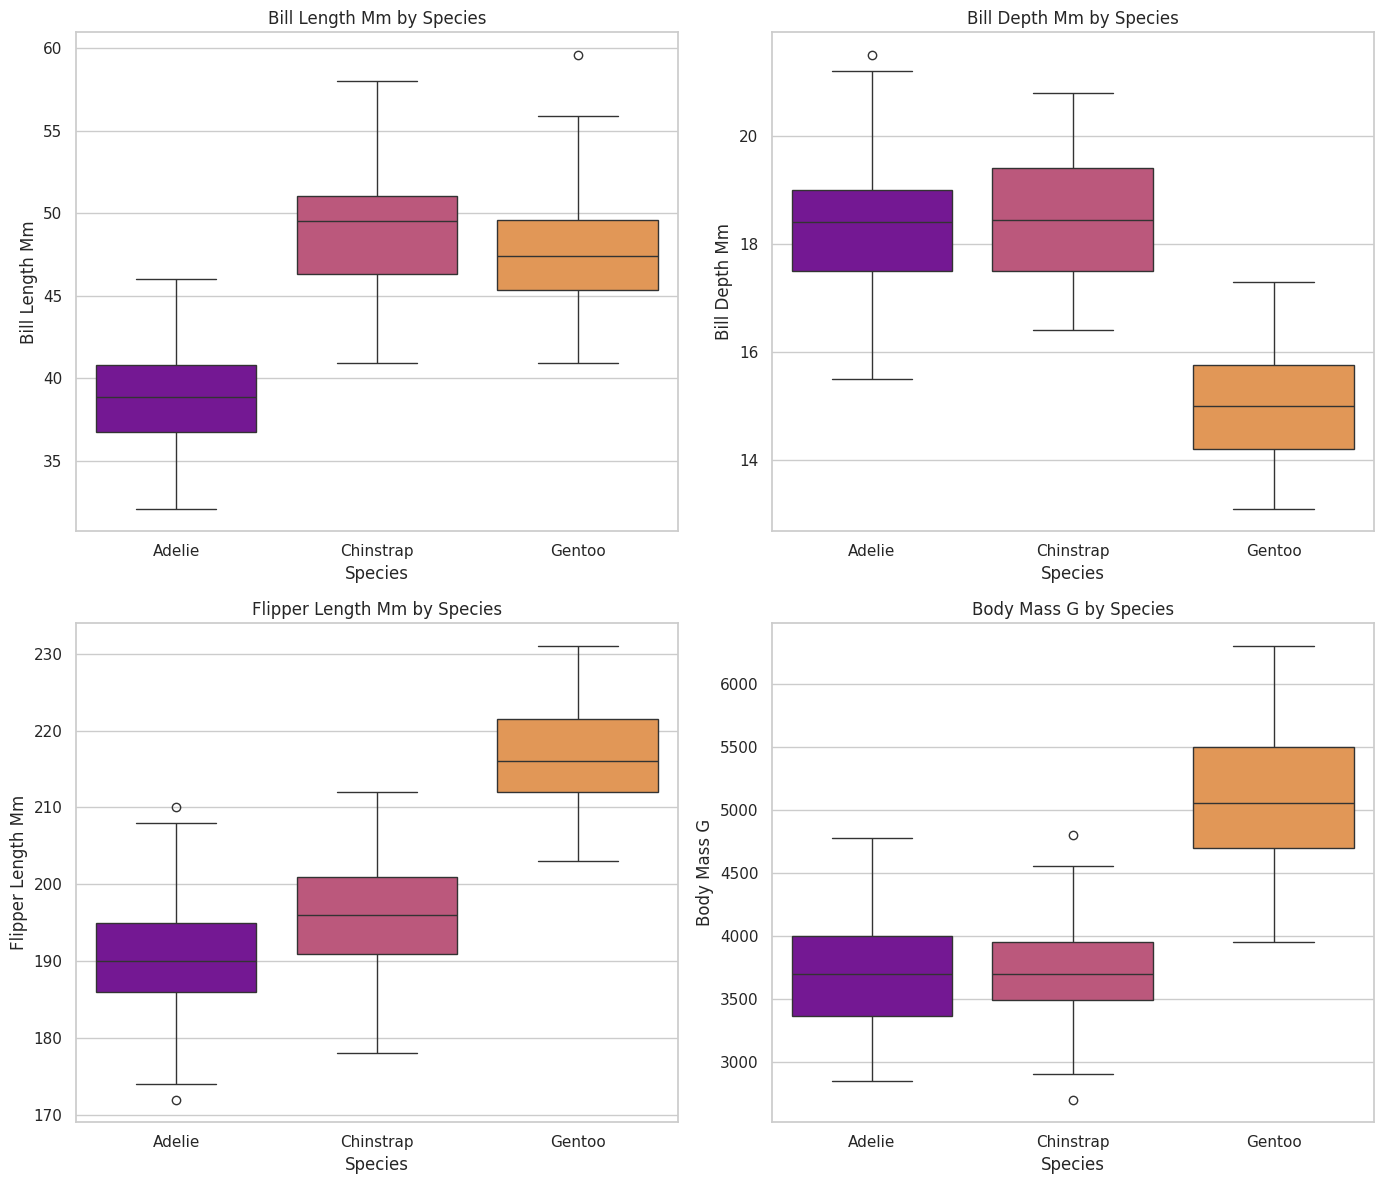

Observation: Box plots clearly show the distinct ranges and central tendencies for each physical measurement across the three species.

Generating Pair Plot (may take a moment)...


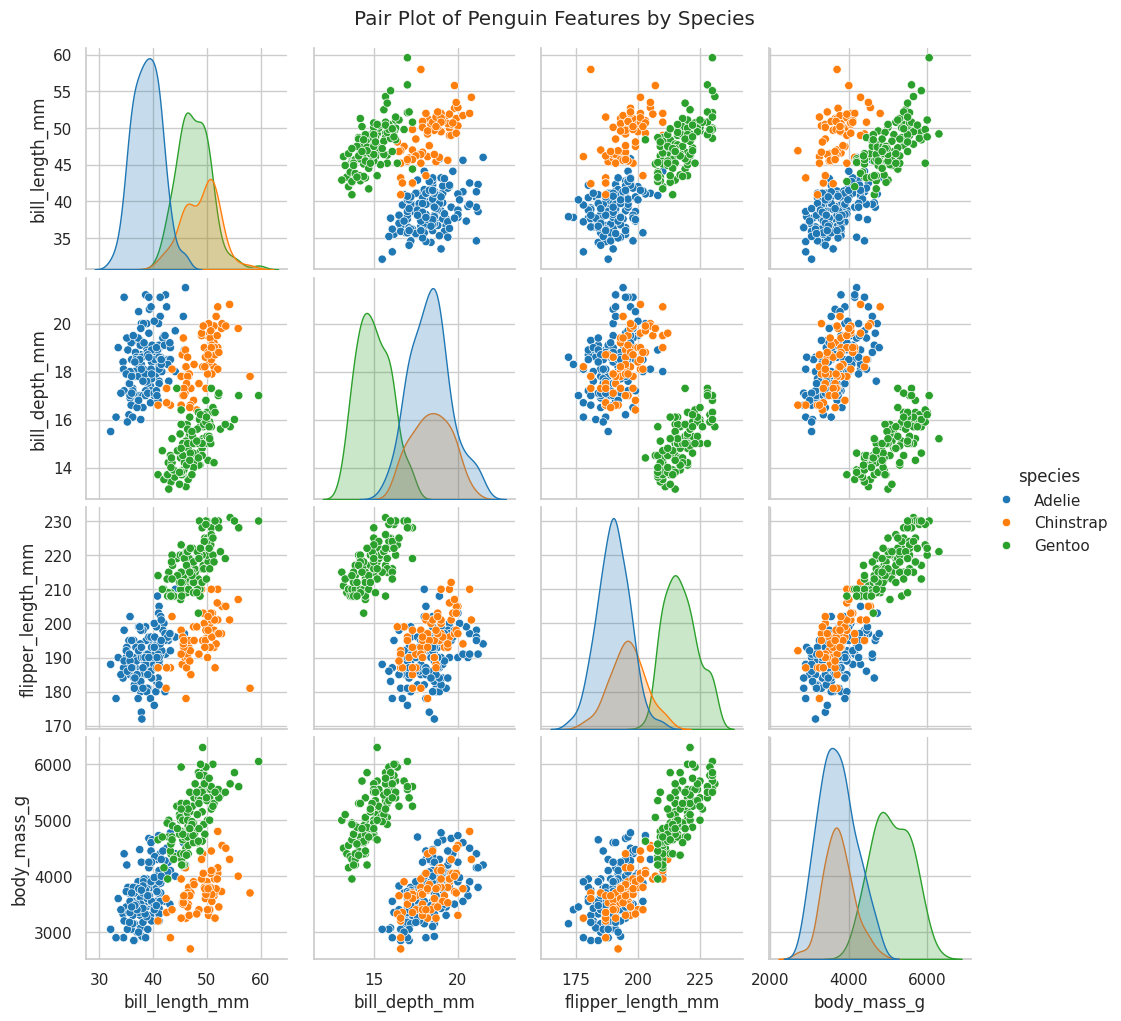

Observation: Pair plot provides a rich overview, confirming linear relationships between some features and demonstrating clear separation by species in most pairwise plots.



In [6]:
print("--- Creating Visualizations ---")

sns.set_theme(style="whitegrid", palette="viridis")

# 1. Distribution of Body Mass by Species (Histogram/KDE)
# Insight: Are there clear mass differences between species?
plt.figure(figsize=(10, 6))
sns.histplot(data=df_penguins_cleaned, x='body_mass_g', hue='species', kde=True, multiple='stack')
plt.title('Distribution of Body Mass Across Penguin Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.legend(title='Species', labels=df_penguins_cleaned['species'].unique())
plt.tight_layout()
plt.show()
print("Observation: Adelie penguins generally have lower body mass, while Gentoo are largest. Chinstrap are in between.\n")

# 2. Bill Length vs. Bill Depth by Species and Island (Scatter Plot)
# Insight: Can we distinguish species by bill dimensions? How does island play a role?
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_penguins_cleaned, x='bill_length_mm', y='bill_depth_mm',
                hue='species', style='island', s=100, alpha=0.8)
plt.title('Bill Dimensions of Penguins by Species and Island')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Observation: Species are clearly separable by bill dimensions. Islands also show some distinct clusters within species.\n")

# 3. Flipper Length vs. Body Mass by Species (Joint Plot)
# Insight: Is there a strong positive correlation between flipper length and body mass?
# This combines scatter plot with marginal distributions.
sns.jointplot(data=df_penguins_cleaned, x='flipper_length_mm', y='body_mass_g', hue='species', kind='scatter', alpha=0.8)
plt.suptitle('Flipper Length vs. Body Mass by Species', y=1.02) # y is vertical adjustment for suptitle
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()
print("Observation: Flipper length and body mass are strongly positively correlated within each species, confirming expected biological relationships.\n")

# 4. Count of Penguins by Island and Sex (Count Plot)
# Insight: How are penguins distributed across islands and by sex?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_penguins_cleaned, x='island', hue='sex', palette='coolwarm')
plt.title('Number of Penguins by Island and Sex')
plt.xlabel('Island')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()
print("Observation: Biscoe has the most penguins. Male and female counts are generally balanced across islands.\n")

# 5. Box Plots for Numerical Features by Species
# Insight: Visualizing the spread and central tendency of different features for each species, identifying outliers.
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], data=df_penguins_cleaned, x='species', y=col, palette='plasma')
    axes[i].set_title(f'{col.replace("_", " ").title()} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()
print("Observation: Box plots clearly show the distinct ranges and central tendencies for each physical measurement across the three species.\n")

# 6. Pair Plot (showing relationships between all numerical variables, colored by species)
# Insight: A comprehensive overview of pairwise relationships and distributions.
print("Generating Pair Plot (may take a moment)...")
sns.pairplot(df_penguins_cleaned, hue='species', palette='tab10')
plt.suptitle('Pair Plot of Penguin Features by Species', y=1.02) # Adjust suptitle position
plt.show()
print("Observation: Pair plot provides a rich overview, confirming linear relationships between some features and demonstrating clear separation by species in most pairwise plots.\n")